In [1]:
#data for this model is taken from face_similarity notebook. 

In [2]:
import matplotlib.pyplot as plt
from random import randrange
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
X = []
y = []
for line in open('X.txt','r'):
  line = line[:-2]
  X.append([float(i) for i in line.split(",")])

for line in open('y.txt','r'):
  y.append(int(line[0]))

In [4]:
X_new = [X[i] for i in range(len(X)) if y[i] == 1]
y_new = [1 for i in range(len(X_new))]

In [5]:


ONES = (y.count(1) * 4) // 2;
print(ONES)
cnt = 0;
while cnt < ONES:
  index = randrange(len(y))
  if(y[index] == 0):
    y_new.append(0)
    X_new.append(X[index])
    cnt = cnt + 1

2380


In [6]:

temp = list(zip(X_new, y_new))
random.shuffle(temp)
X_new, y_new = zip(*temp)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new,test_size = 0.3)

In [8]:
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [9]:
accuracy_score(clf.predict(x_test), y_test)

0.6339869281045751

In [10]:
#tuning

esti = []
accuracy = []
for estimators in range(10,500):
  esti.append(estimators)
  clf=RandomForestClassifier(n_estimators=150)

  #Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(x_train,y_train)

  accuracy.append(accuracy_score(clf.predict(x_test), y_test))


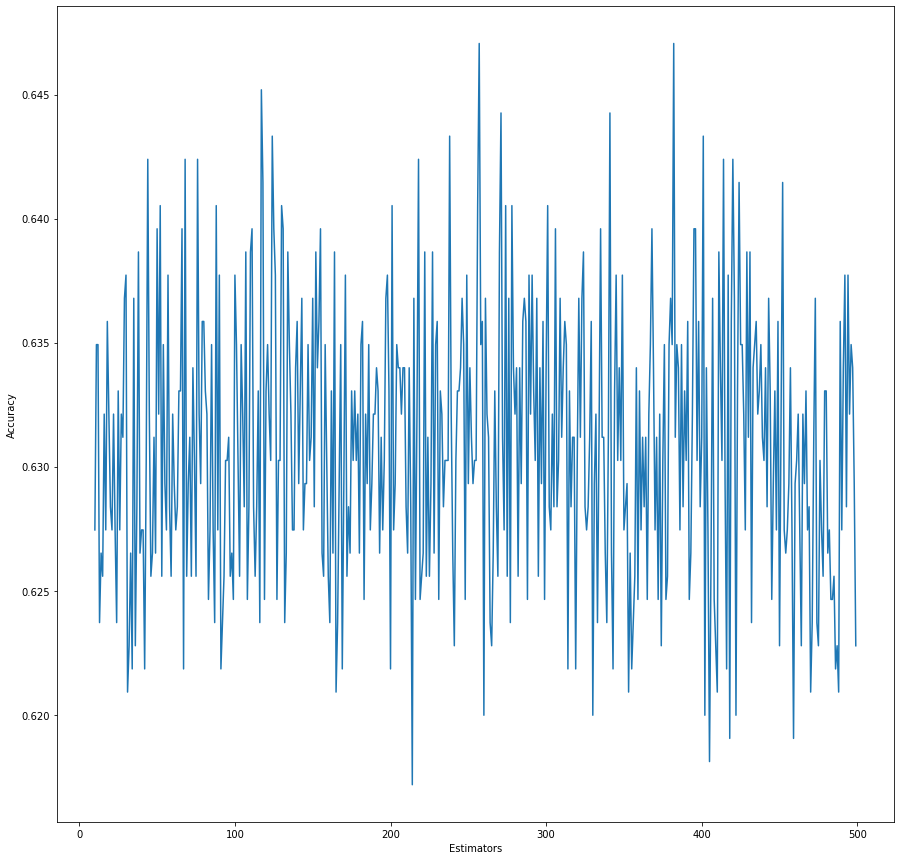

In [16]:

fig, ax = plt.subplots(figsize=(15,15))
ax.plot(esti, accuracy)
ax.set_xlabel('Estimators')
ax.set_ylabel('Accuracy')

plt.show()

In [21]:
test_size = []
accuracy = []
for i in range (1,90):
  test_size.append(i/100)
  x_train, x_test, y_train, y_test = train_test_split(X_new, y_new,test_size = i/100)
  clf=RandomForestClassifier(n_estimators=150)
  #Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(x_train,y_train)
  accuracy.append(accuracy_score(clf.predict(x_test), y_test))

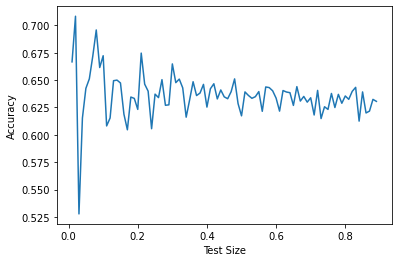

In [22]:
#plot the graph of test size versus accuracy
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(test_size, accuracy)
ax.set_xlabel('Test Size')
ax.set_ylabel('Accuracy')
plt.show()